In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore")

In [2]:
import pickle
main_programs = pickle.load(open("main_programs", "rb"))
main_programs

['18_GP5_910_CW.DBF',
 '17_GP5_430_CCW.DBF',
 '12_GP5_430B_D1.DBF',
 '15_GP5_340_CCW.DBF',
 '14_GP5_340_D1.DBF',
 '13_GP5_500_CW.DBF',
 '16_GP5_500_CCW.DBF']

In [3]:
path = "C:/Users/Mauro/OneDrive/Documenti/Industry Lab/19-20/DB Bosch"
gp5 = {}
for p in main_programs:
    gp5[p] = pd.read_csv(os.path.join(path, p + ".csv"))
    print(p, gp5[p].shape)

18_GP5_910_CW.DBF (225232, 8)
17_GP5_430_CCW.DBF (32761, 8)
12_GP5_430B_D1.DBF (25066, 8)
15_GP5_340_CCW.DBF (2314, 8)
14_GP5_340_D1.DBF (2240, 8)
13_GP5_500_CW.DBF (1739, 8)
16_GP5_500_CCW.DBF (1433, 8)


In [4]:
print(main_programs[0])
gp5[main_programs[0]].head()

18_GP5_910_CW.DBF


,media_coppia_finale,media_pressione_velocita_1,media_portata_velocita_1,portata_teorica_velocita_1,alpha,media_pressione_velocita_a_regime,media_portata_velocita_a_regime,Temperatura
0,0.143800,1.643796,51.481518,108.36,34.601901,12.041801,1341.342041,42.196945
1,0.118703,1.989826,56.367321,108.36,26.129255,12.293318,1353.738770,42.226974
2,0.122338,1.576096,50.676632,108.36,36.598894,11.981997,1338.023438,42.201241
3,0.103383,1.753183,53.969971,108.36,31.023595,11.921815,1334.420288,42.116058
4,0.149168,2.027986,56.371098,108.36,25.635736,12.308569,1354.834473,42.087067


**NOVELTY DETECTION: ISOLATION FOREST**

18_GP5_910_CW.DBF 
train: 157662 test: 67570 accuracy: 0.9 



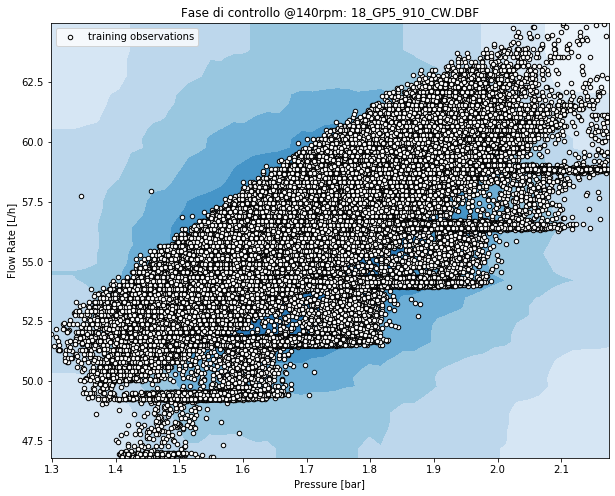

17_GP5_430_CCW.DBF 
train: 22932 test: 9829 accuracy: 0.902 



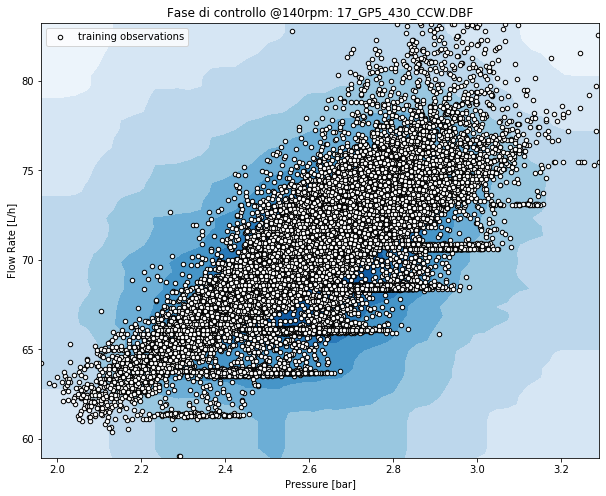

12_GP5_430B_D1.DBF 
train: 17546 test: 7520 accuracy: 0.899 



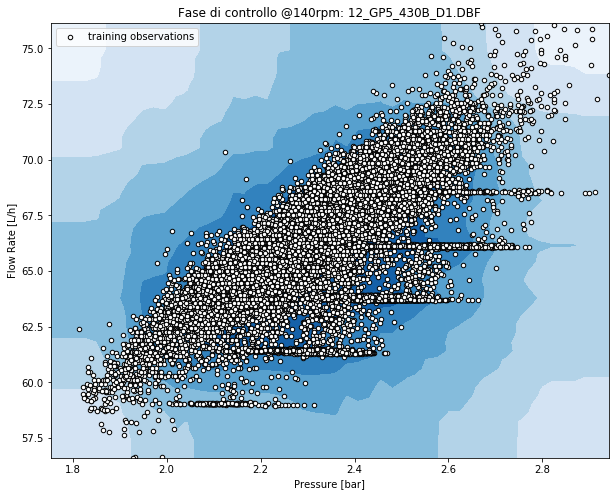

15_GP5_340_CCW.DBF 
train: 1619 test: 695 accuracy: 0.901 



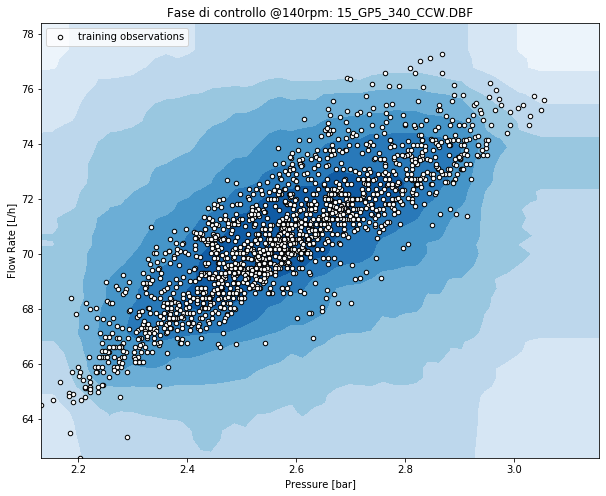

14_GP5_340_D1.DBF 
train: 1568 test: 672 accuracy: 0.908 



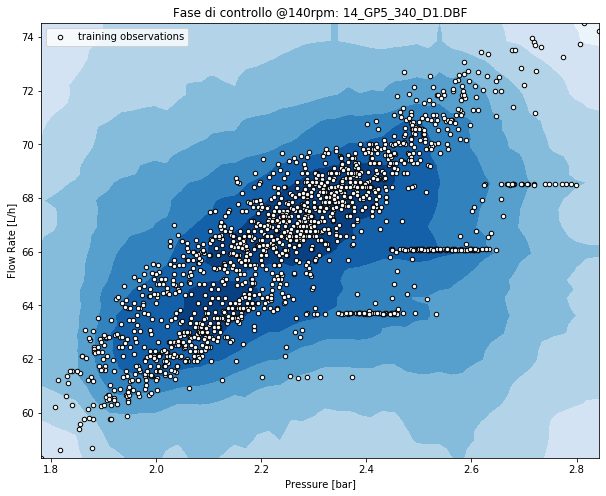

13_GP5_500_CW.DBF 
train: 1217 test: 522 accuracy: 0.872 



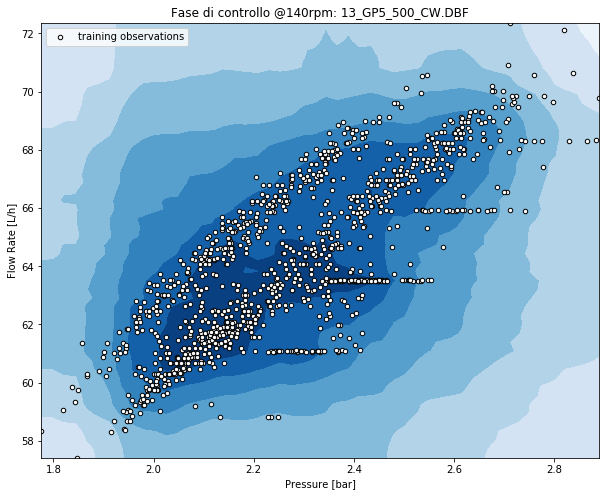

16_GP5_500_CCW.DBF 
train: 1003 test: 430 accuracy: 0.9 



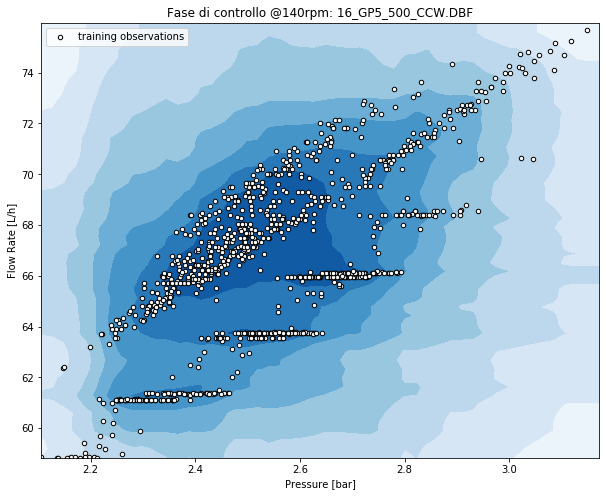

In [6]:
from sklearn.model_selection import train_test_split
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

for p in main_programs:
    train, test = train_test_split(gp5[p], test_size=0.3, random_state=0)
    IF = IForest(random_state=0)
    IF.fit(train[['media_pressione_velocita_1', 'media_portata_velocita_1']])
    outlier_flags = IF.predict(test[['media_pressione_velocita_1', 'media_portata_velocita_1']])
    print(p, "\ntrain:", train.shape[0], "test:", test.shape[0], "accuracy:", round(1 - (sum(outlier_flags)/len(test)), 3), "\n")
    
    min_pres = min(train['media_pressione_velocita_1'].min(), test['media_pressione_velocita_1'].min())
    min_port = min(train['media_portata_velocita_1'].min(), test['media_portata_velocita_1'].min())
    max_pres = max(train['media_pressione_velocita_1'].max(), test['media_pressione_velocita_1'].max())
    max_port = max(train['media_portata_velocita_1'].max(), test['media_portata_velocita_1'].max())
    xx, yy = np.meshgrid(np.linspace(min_pres, max_pres, 50), np.linspace(min_port, max_port, 50))
    Z = IF.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.title("Fase di controllo @140rpm: " + p)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    b1 = plt.scatter(train['media_pressione_velocita_1'], train['media_portata_velocita_1'], c='white', s=20, edgecolor='k')
    plt.axis('tight')
    plt.xlim((min_pres, max_pres))
    plt.ylim((min_port, max_port))
    plt.legend([b1], ["training observations"], loc="upper left")
    plt.xlabel("Pressure [bar]")
    plt.ylabel("Flow Rate [L/h]")
    plt.show()
    plt.close()

**TEST SU UNA NUOVA OSSERVAZIONE**

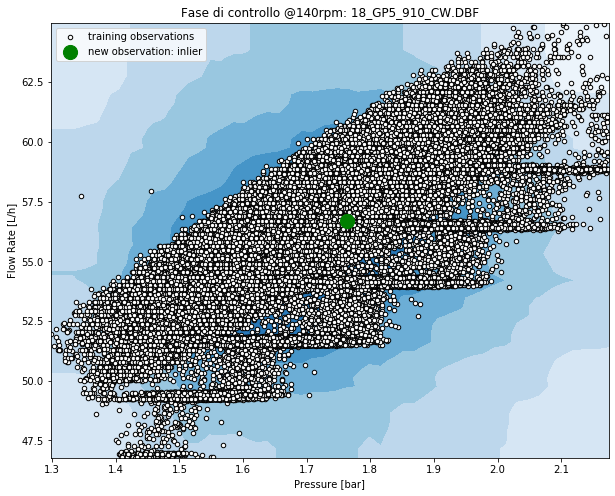

Pressione:	 1.76 bar
Portata:	 56.7 L/h


In [8]:
train, test = train_test_split(gp5[main_programs[0]], test_size=0.3, random_state=0)
IF = IForest(random_state=0)
IF.fit(train[['media_pressione_velocita_1', 'media_portata_velocita_1']])
min_pres = min(train['media_pressione_velocita_1'].min(), test['media_pressione_velocita_1'].min())
min_port = min(train['media_portata_velocita_1'].min(), test['media_portata_velocita_1'].min())
max_pres = max(train['media_pressione_velocita_1'].max(), test['media_pressione_velocita_1'].max())
max_port = max(train['media_portata_velocita_1'].max(), test['media_portata_velocita_1'].max())
xx, yy = np.meshgrid(np.linspace(min_pres, max_pres, 50), np.linspace(min_port, max_port, 50))
Z = IF.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
plt.figure(figsize=(10, 8))
plt.title("Fase di controllo @140rpm: " + main_programs[0])
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(train['media_pressione_velocita_1'], train['media_portata_velocita_1'], c='white', s=20, edgecolor='k')
flag = IF.predict(pd.DataFrame(test[['media_pressione_velocita_1', 'media_portata_velocita_1']].iloc[1]).transpose())
if flag==0:
    b2 = plt.scatter(test.iloc[1].media_pressione_velocita_1, test.iloc[1].media_portata_velocita_1, s=200, color="green")
    plt.legend([b1, b2], ["training observations", "new observation: inlier"], loc="upper left")
elif flag==1:
    b2 = plt.scatter(test.iloc[1].media_pressione_velocita_1, test.iloc[1].media_portata_velocita_1, s=200, color="red")
    plt.legend([b1, b2], ["training observations", "new observation: outlier"], loc="upper left")
plt.axis('tight')
plt.xlim((min_pres, max_pres))
plt.ylim((min_port, max_port))
plt.xlabel("Pressure [bar]")
plt.ylabel("Flow Rate [L/h]")
plt.show()
print("Pressione:\t", round(test['media_pressione_velocita_1'].iloc[1], 2), "bar")
print("Portata:\t", round(test['media_portata_velocita_1'].iloc[1], 2), "L/h")